In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df = pd.read_csv('house_price_mumbai.csv')
df.head()

,BHK,project,Location,City,Total sqft,price_sqft,price
0,3 BHK Apartment,SHREE KRISHNA SangamChembur,Chembur,Mumbai,984,"31,000",3.05 Cr
1,2 BHK Apartment,Ekdanta 24 KaratKurla,Kurla,Mumbai,598,"23,913",1.42 Cr
2,2 BHK Apartment,Liberty Bay VueMalad West,Malad West,Mumbai,738,"21,000",1.54 Cr
3,3 BHK Apartment,Thalia Vrindavan FloraRasayani,Rasayani,Mumbai,644,"10,676",68.75 L
4,2 BHK Apartment,Mayfair The ViewVikhroli,Vikhroli,Mumbai,582,"24,914",1.45 Cr


In [3]:
df.shape

(3980, 7)

In [4]:
df2 = df.drop(['project','City'],axis = 1)
df2.head()

,BHK,Location,Total sqft,price_sqft,price
0,3 BHK Apartment,Chembur,984,"31,000",3.05 Cr
1,2 BHK Apartment,Kurla,598,"23,913",1.42 Cr
2,2 BHK Apartment,Malad West,738,"21,000",1.54 Cr
3,3 BHK Apartment,Rasayani,644,"10,676",68.75 L
4,2 BHK Apartment,Vikhroli,582,"24,914",1.45 Cr


In [5]:
len(df2['Location'].unique())

174

In [6]:
df2['BHK'].nunique()

23

In [7]:
df2['BHK'].unique()

array(['3 BHK Apartment', '2 BHK Apartment', '1 BHK Independent House',
       '1 BHK Apartment', '1 RK Studio Apartment', '1', '4 BHK Apartment',
       'R', '3', '2', '5 BHK Independent Floor',
       '6 BHK Independent Floor', '3 BHK Independent Floor',
       '3 BHK Independent House', '3 BHK Villa', '4',
       '2 BHK Independent Floor', '5', '2 RK Studio Apartment',
       '5 BHK Independent House', '6', '5 BHK Apartment',
       '2 BHK Independent House'], dtype=object)

In [8]:
def bhkclean(x):
    y = x.split(' ')[0]
    return int(y)

In [9]:
bhkclean('3 BHK Apartment')

3

In [10]:
bhkclean('3')

3

In [11]:
df3 = df2.drop(df2[df2['BHK'] == 'R'].index,axis = 0)
df3['BHK'].unique()

array(['3 BHK Apartment', '2 BHK Apartment', '1 BHK Independent House',
       '1 BHK Apartment', '1 RK Studio Apartment', '1', '4 BHK Apartment',
       '3', '2', '5 BHK Independent Floor', '6 BHK Independent Floor',
       '3 BHK Independent Floor', '3 BHK Independent House',
       '3 BHK Villa', '4', '2 BHK Independent Floor', '5',
       '2 RK Studio Apartment', '5 BHK Independent House', '6',
       '5 BHK Apartment', '2 BHK Independent House'], dtype=object)

In [12]:
df3['BHK_final'] = df3['BHK'].apply(bhkclean)
df3.head()

,BHK,Location,Total sqft,price_sqft,price,BHK_final
0,3 BHK Apartment,Chembur,984,"31,000",3.05 Cr,3
1,2 BHK Apartment,Kurla,598,"23,913",1.42 Cr,2
2,2 BHK Apartment,Malad West,738,"21,000",1.54 Cr,2
3,3 BHK Apartment,Rasayani,644,"10,676",68.75 L,3
4,2 BHK Apartment,Vikhroli,582,"24,914",1.45 Cr,2


In [13]:
df3['BHK_final'].unique()

array([3, 2, 1, 4, 5, 6], dtype=int64)

In [14]:
def priceclean(st):
    x = st.split(' ')
    if x[1] == 'L':
        y = float(x[0])/100
        return round(float(y),2)
    return float(x[0])

In [15]:
df4 = df3.copy()
df4['price_final'] = df3['price'].apply(priceclean)

In [16]:
priceclean('68.75 L')

0.69

In [17]:
df4.head()

,BHK,Location,Total sqft,price_sqft,price,BHK_final,price_final
0,3 BHK Apartment,Chembur,984,"31,000",3.05 Cr,3,3.05
1,2 BHK Apartment,Kurla,598,"23,913",1.42 Cr,2,1.42
2,2 BHK Apartment,Malad West,738,"21,000",1.54 Cr,2,1.54
3,3 BHK Apartment,Rasayani,644,"10,676",68.75 L,3,0.69
4,2 BHK Apartment,Vikhroli,582,"24,914",1.45 Cr,2,1.45


In [18]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3948 entries, 0 to 3979
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BHK          3948 non-null   object 
 1   Location     3948 non-null   object 
 2   Total sqft   3948 non-null   int64  
 3   price_sqft   3948 non-null   object 
 4   price        3948 non-null   object 
 5   BHK_final    3948 non-null   int64  
 6   price_final  3948 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 246.8+ KB


In [19]:
int('31000')

31000

In [20]:
df4.isna().sum()

BHK            0
Location       0
Total sqft     0
price_sqft     0
price          0
BHK_final      0
price_final    0
dtype: int64

In [21]:
def price_sqft_clean(st):
    y = int(''.join(st.split(',')))
    return y

In [22]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price_sqft'].apply(price_sqft_clean)

In [23]:
int(''.join('31,000'.split(',')))

31000

In [24]:
df5.head()

,BHK,Location,Total sqft,price_sqft,price,BHK_final,price_final,price_per_sqft
0,3 BHK Apartment,Chembur,984,"31,000",3.05 Cr,3,3.05,31000
1,2 BHK Apartment,Kurla,598,"23,913",1.42 Cr,2,1.42,23913
2,2 BHK Apartment,Malad West,738,"21,000",1.54 Cr,2,1.54,21000
3,3 BHK Apartment,Rasayani,644,"10,676",68.75 L,3,0.69,10676
4,2 BHK Apartment,Vikhroli,582,"24,914",1.45 Cr,2,1.45,24914


In [25]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3948 entries, 0 to 3979
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BHK             3948 non-null   object 
 1   Location        3948 non-null   object 
 2   Total sqft      3948 non-null   int64  
 3   price_sqft      3948 non-null   object 
 4   price           3948 non-null   object 
 5   BHK_final       3948 non-null   int64  
 6   price_final     3948 non-null   float64
 7   price_per_sqft  3948 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 277.6+ KB


In [26]:
df5['Location'].nunique()

168

In [27]:
check = df5['Location'].value_counts().rename_axis('unique_values').reset_index(name='counts')
check.head()

,unique_values,counts
0,Andheri West,526
1,Mira Road East,285
2,Dombivali,240
3,Virar,186
4,Thane West,149


In [28]:
req_places = list(check[check['counts'] > 10]['unique_values'])
req_places

['Andheri West',
 'Mira Road East',
 'Dombivali',
 'Virar',
 'Thane West',
 'Malad West',
 'Kharghar',
 'Naigaon East',
 'Mulund West',
 'Airoli',
 'Panvel',
 'Bhiwandi',
 'Kalyan West',
 'Karjat',
 'Dombivali East',
 'Bhandup West',
 'Kandivali East',
 'Bandra West',
 'Chembur',
 'Kandivali West',
 'Koper Khairane',
 'Kalwa',
 'Vasai',
 'Malad East',
 'Borivali West',
 'Badlapur West',
 'Powai',
 'Dahisar',
 'Goregaon East',
 'Jogeshwari West',
 'Byculla',
 'Palghar',
 'Neral',
 'Diva Gaon',
 'Taloja',
 'Karanjade',
 'Rasayani',
 'Ulwe',
 'Andheri East',
 'Bhayandar East',
 'Kurla',
 'Borivali East',
 'Badlapur East',
 'Nala Sopara',
 'Agripada',
 'Sion',
 'Mazgaon',
 'Ambernath East',
 'Dombivli (West)',
 'Ghansoli',
 'Santacruz East',
 'Bhandup East',
 'Wadala',
 'Vikhroli',
 'Kalamboli',
 'Seawoods',
 'Ghatkopar East',
 'Kamothe',
 'Thakurli',
 'Bandra Kurla Complex',
 'Khar West',
 'Vashi',
 'Ghatkopar West',
 'Vichumbe',
 'Lower Parel']

In [29]:
def location_check(x):
    if x in req_places:
        return x
    return 'other'

In [30]:
location_check('Dahisar')

'Dahisar'

In [31]:
location_check('Bhuvan')

'other'

In [32]:
df6 = df5.copy()
df6['Location'] = df5['Location'].apply(location_check)
df6.Location.nunique()

66

In [33]:
df6.head()

,BHK,Location,Total sqft,price_sqft,price,BHK_final,price_final,price_per_sqft
0,3 BHK Apartment,Chembur,984,"31,000",3.05 Cr,3,3.05,31000
1,2 BHK Apartment,Kurla,598,"23,913",1.42 Cr,2,1.42,23913
2,2 BHK Apartment,Malad West,738,"21,000",1.54 Cr,2,1.54,21000
3,3 BHK Apartment,Rasayani,644,"10,676",68.75 L,3,0.69,10676
4,2 BHK Apartment,Vikhroli,582,"24,914",1.45 Cr,2,1.45,24914


In [34]:
df7 = df6.copy()
label = LabelEncoder()
df7['location'] = label.fit_transform(df6['Location'])
df7.head()

,BHK,Location,Total sqft,price_sqft,price,BHK_final,price_final,price_per_sqft,location
0,3 BHK Apartment,Chembur,984,"31,000",3.05 Cr,3,3.05,31000,16
1,2 BHK Apartment,Kurla,598,"23,913",1.42 Cr,2,1.42,23913,38
2,2 BHK Apartment,Malad West,738,"21,000",1.54 Cr,2,1.54,21000,41
3,3 BHK Apartment,Rasayani,644,"10,676",68.75 L,3,0.69,10676,51
4,2 BHK Apartment,Vikhroli,582,"24,914",1.45 Cr,2,1.45,24914,62


In [35]:
df7[df7['location'] == 16]

,BHK,Location,Total sqft,price_sqft,price,BHK_final,price_final,price_per_sqft,location
0,3 BHK Apartment,Chembur,984,"31,000",3.05 Cr,3,3.05,31000,16
41,1 BHK Apartment,Chembur,320,"21,844",69.9 L,1,0.70,21844,16
68,2 BHK Apartment,Chembur,522,"25,692",1.34 Cr,2,1.34,25692,16
69,3 BHK Apartment,Chembur,917,"31,000",2.84 Cr,3,2.84,31000,16
122,2 BHK Apartment,Chembur,834,"25,692",2.14 Cr,2,2.14,25692,16
123,2 BHK Apartment,Chembur,841,"25,692",2.16 Cr,2,2.16,25692,16
124,2 BHK Apartment,Chembur,825,"25,692",2.11 Cr,2,2.11,25692,16
125,2 BHK Apartment,Chembur,775,"23,681",1.83 Cr,2,1.83,23681,16
126,2 BHK Apartment,Chembur,528,"25,692",1.35 Cr,2,1.35,25692,16
127,2 BHK Apartment,Chembur,511,"25,692",1.31 Cr,2,1.31,25692,16


In [36]:
df7.columns

Index(['BHK', 'Location', 'Total sqft', 'price_sqft', 'price', 'BHK_final',
       'price_final', 'price_per_sqft', 'location'],
      dtype='object')

In [37]:
df7.head(3)

,BHK,Location,Total sqft,price_sqft,price,BHK_final,price_final,price_per_sqft,location
0,3 BHK Apartment,Chembur,984,"31,000",3.05 Cr,3,3.05,31000,16
1,2 BHK Apartment,Kurla,598,"23,913",1.42 Cr,2,1.42,23913,38
2,2 BHK Apartment,Malad West,738,"21,000",1.54 Cr,2,1.54,21000,41


In [38]:
df8 = df7.drop(['BHK','Location','price_sqft','price'],axis = 1)
df8.head()

,Total sqft,BHK_final,price_final,price_per_sqft,location
0,984,3,3.05,31000,16
1,598,2,1.42,23913,38
2,738,2,1.54,21000,41
3,644,3,0.69,10676,51
4,582,2,1.45,24914,62


In [39]:
X = df8.drop('price_final',axis = 1).values
y = df8['price_final'].values

In [40]:
# plt.title('For ')
pd.Series(df8['BHK_final'].groupby(df8['location']))[0][1].T

272     1
1671    2
1945    1
2693    2
2696    3
2697    4
2700    3
2705    1
2831    3
3106    2
3399    3
3416    2
3417    3
3421    2
3422    3
3425    2
3438    3
3862    1
3935    2
3938    2
Name: BHK_final, dtype: int64

In [41]:
df8.columns

Index(['Total sqft', 'BHK_final', 'price_final', 'price_per_sqft', 'location'], dtype='object')

In [42]:
df8['BHK_final'].unique()

array([3, 2, 1, 4, 5, 6], dtype=int64)

In [43]:
df8.describe()

,Total sqft,BHK_final,price_final,price_per_sqft,location
count,3948.00,3948.00,3948.00,3948.00,3948.00
mean,877.67,1.85,1.13,12030.71,33.10
std,556.60,1.08,1.71,10143.12,21.17
min,127.00,1.00,0.04,1249.00,0.00
25%,585.75,1.00,0.29,4915.50,14.00
50%,715.00,2.00,0.65,9090.00,36.00
75%,1050.00,2.00,1.35,16257.25,49.00
max,12600.00,6.00,30.00,92592.00,65.00


In [44]:
df8[df8['price_final'] == 0.040000]

,Total sqft,BHK_final,price_final,price_per_sqft,location
324,250,1,0.04,1520,65


In [45]:
#7Zeors to crores
df8.head()

,Total sqft,BHK_final,price_final,price_per_sqft,location
0,984,3,3.05,31000,16
1,598,2,1.42,23913,38
2,738,2,1.54,21000,41
3,644,3,0.69,10676,51
4,582,2,1.45,24914,62


In [46]:
(31000*984)/10000000

3.0504

In [47]:
df8['price_per_sqft'].describe()

count    3948.00
mean    12030.71
std     10143.12
min      1249.00
25%      4915.50
50%      9090.00
75%     16257.25
max     92592.00
Name: price_per_sqft, dtype: float64

<AxesSubplot: >

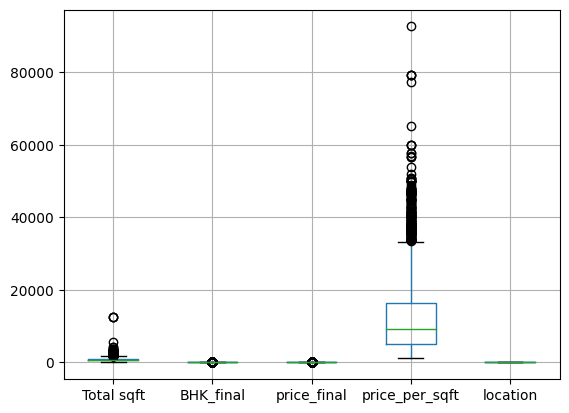

In [48]:
df8.boxplot()

In [49]:
df7.head()

,BHK,Location,Total sqft,price_sqft,price,BHK_final,price_final,price_per_sqft,location
0,3 BHK Apartment,Chembur,984,"31,000",3.05 Cr,3,3.05,31000,16
1,2 BHK Apartment,Kurla,598,"23,913",1.42 Cr,2,1.42,23913,38
2,2 BHK Apartment,Malad West,738,"21,000",1.54 Cr,2,1.54,21000,41
3,3 BHK Apartment,Rasayani,644,"10,676",68.75 L,3,0.69,10676,51
4,2 BHK Apartment,Vikhroli,582,"24,914",1.45 Cr,2,1.45,24914,62


In [50]:
# new = df7[df7['Location'] == 'Andheri West']
# new = new.loc[:,['price_sqft','BHK_final','Total sqft']]
# y = new[new['BHK_final'] == 1]
# y = y.loc[:,['price_sqft','Total sqft']]
# y.head()
# plt.scatter(y['Total sqft'],y['price_sqft'],c='orange')

In [51]:
def ploting(df,loc):
    mark = ['o','^','s','*','>']
    col = ['red','lime','black','green','orange']
    x = df[df['Location'] == loc]
    x = x.loc[:,['price_sqft','BHK_final','Total sqft']]
    print('o-> 1,^-> 2,square-> 3,*->4,>-> 5')
    plt.figure(figsize = (15,15))
    plt.title(loc)
    plt.xlabel('Total sqft')
    plt.ylabel('price_sqft')
    for i in range(5):
        y = x[x['BHK_final'] == i]
        plt.scatter(y['Total sqft'],y['price_sqft'],c=col[i],marker=mark[i]) 
    

In [53]:
ploting(df7,'Mulund West')

o-> 1,^-> 2,square-> 3,*->4,>-> 5


In [54]:
df7[df7['Location'] == 'Agripada']['BHK_final'].value_counts()

2    8
3    7
1    4
4    1
Name: BHK_final, dtype: int64

In [55]:
df.head()

,BHK,project,Location,City,Total sqft,price_sqft,price
0,3 BHK Apartment,SHREE KRISHNA SangamChembur,Chembur,Mumbai,984,"31,000",3.05 Cr
1,2 BHK Apartment,Ekdanta 24 KaratKurla,Kurla,Mumbai,598,"23,913",1.42 Cr
2,2 BHK Apartment,Liberty Bay VueMalad West,Malad West,Mumbai,738,"21,000",1.54 Cr
3,3 BHK Apartment,Thalia Vrindavan FloraRasayani,Rasayani,Mumbai,644,"10,676",68.75 L
4,2 BHK Apartment,Mayfair The ViewVikhroli,Vikhroli,Mumbai,582,"24,914",1.45 Cr


In [56]:
df9 = df.copy()
df9.head()

,BHK,project,Location,City,Total sqft,price_sqft,price
0,3 BHK Apartment,SHREE KRISHNA SangamChembur,Chembur,Mumbai,984,"31,000",3.05 Cr
1,2 BHK Apartment,Ekdanta 24 KaratKurla,Kurla,Mumbai,598,"23,913",1.42 Cr
2,2 BHK Apartment,Liberty Bay VueMalad West,Malad West,Mumbai,738,"21,000",1.54 Cr
3,3 BHK Apartment,Thalia Vrindavan FloraRasayani,Rasayani,Mumbai,644,"10,676",68.75 L
4,2 BHK Apartment,Mayfair The ViewVikhroli,Vikhroli,Mumbai,582,"24,914",1.45 Cr


In [57]:
df9['price'] = df['price'].apply(priceclean)
df9.head()

,BHK,project,Location,City,Total sqft,price_sqft,price
0,3 BHK Apartment,SHREE KRISHNA SangamChembur,Chembur,Mumbai,984,"31,000",3.05
1,2 BHK Apartment,Ekdanta 24 KaratKurla,Kurla,Mumbai,598,"23,913",1.42
2,2 BHK Apartment,Liberty Bay VueMalad West,Malad West,Mumbai,738,"21,000",1.54
3,3 BHK Apartment,Thalia Vrindavan FloraRasayani,Rasayani,Mumbai,644,"10,676",0.69
4,2 BHK Apartment,Mayfair The ViewVikhroli,Vikhroli,Mumbai,582,"24,914",1.45


In [58]:
df9['price_sqft'] = df['price_sqft'].apply(price_sqft_clean)
df9.head()

,BHK,project,Location,City,Total sqft,price_sqft,price
0,3 BHK Apartment,SHREE KRISHNA SangamChembur,Chembur,Mumbai,984,31000,3.05
1,2 BHK Apartment,Ekdanta 24 KaratKurla,Kurla,Mumbai,598,23913,1.42
2,2 BHK Apartment,Liberty Bay VueMalad West,Malad West,Mumbai,738,21000,1.54
3,3 BHK Apartment,Thalia Vrindavan FloraRasayani,Rasayani,Mumbai,644,10676,0.69
4,2 BHK Apartment,Mayfair The ViewVikhroli,Vikhroli,Mumbai,582,24914,1.45


In [59]:
df8.head()

,Total sqft,BHK_final,price_final,price_per_sqft,location
0,984,3,3.05,31000,16
1,598,2,1.42,23913,38
2,738,2,1.54,21000,41
3,644,3,0.69,10676,51
4,582,2,1.45,24914,62


In [60]:
df8[df8['price_final'] > 2.00][df8[df8['price_final'] > 2.00]['price_final'] < 3.00]

,Total sqft,BHK_final,price_final,price_per_sqft,location
7,671,2,2.72,40536,65
17,771,2,2.21,28664,44
20,2215,3,2.53,11422,36
54,1300,4,2.54,19538,57
59,644,2,2.04,31677,32
...,...,...,...,...,...
3923,1096,3,2.52,22992,14
3925,1036,3,2.38,22972,14
3926,987,3,2.25,22819,32
3934,1025,2,2.25,21951,65


In [61]:
df9.drop(df9[df9['BHK'] == 'R'].index,axis = 0,inplace=True)
df9.shape

(3948, 7)

In [62]:
df7.head()

,BHK,Location,Total sqft,price_sqft,price,BHK_final,price_final,price_per_sqft,location
0,3 BHK Apartment,Chembur,984,"31,000",3.05 Cr,3,3.05,31000,16
1,2 BHK Apartment,Kurla,598,"23,913",1.42 Cr,2,1.42,23913,38
2,2 BHK Apartment,Malad West,738,"21,000",1.54 Cr,2,1.54,21000,41
3,3 BHK Apartment,Rasayani,644,"10,676",68.75 L,3,0.69,10676,51
4,2 BHK Apartment,Vikhroli,582,"24,914",1.45 Cr,2,1.45,24914,62


In [63]:
df9.head()

,BHK,project,Location,City,Total sqft,price_sqft,price
0,3 BHK Apartment,SHREE KRISHNA SangamChembur,Chembur,Mumbai,984,31000,3.05
1,2 BHK Apartment,Ekdanta 24 KaratKurla,Kurla,Mumbai,598,23913,1.42
2,2 BHK Apartment,Liberty Bay VueMalad West,Malad West,Mumbai,738,21000,1.54
3,3 BHK Apartment,Thalia Vrindavan FloraRasayani,Rasayani,Mumbai,644,10676,0.69
4,2 BHK Apartment,Mayfair The ViewVikhroli,Vikhroli,Mumbai,582,24914,1.45


In [64]:
df10 = df7.join(df9['project'])
df10.head()

,BHK,Location,Total sqft,price_sqft,price,BHK_final,price_final,price_per_sqft,location,project
0,3 BHK Apartment,Chembur,984,"31,000",3.05 Cr,3,3.05,31000,16,SHREE KRISHNA SangamChembur
1,2 BHK Apartment,Kurla,598,"23,913",1.42 Cr,2,1.42,23913,38,Ekdanta 24 KaratKurla
2,2 BHK Apartment,Malad West,738,"21,000",1.54 Cr,2,1.54,21000,41,Liberty Bay VueMalad West
3,3 BHK Apartment,Rasayani,644,"10,676",68.75 L,3,0.69,10676,51,Thalia Vrindavan FloraRasayani
4,2 BHK Apartment,Vikhroli,582,"24,914",1.45 Cr,2,1.45,24914,62,Mayfair The ViewVikhroli


In [65]:
df10.iloc[200]
df10.drop(['BHK','price'],axis = 1,inplace = True)

In [66]:
att = 'price_final'
df10[df10[att] > 2.0][df10[df10[att] > 2.00][att] < 3.0]

,Location,Total sqft,price_sqft,BHK_final,price_final,price_per_sqft,location,project
7,other,671,"40,536",2,2.72,40536,65,Aplite Greenstone HeritageFort
17,Mulund West,771,"28,664",2,2.21,28664,44,S Square Rudraksh Heritage Wing A And Wing BMu...
20,Kharghar,2215,"11,422",3,2.53,11422,36,Paradise Sai World EmpireKharghar
54,Thane West,1300,"19,538",4,2.54,19538,57,Shree Krupa Nandanvan Homes Building BThane West
59,Kandivali West,644,"31,677",2,2.04,31677,32,Konark Zen GardensKandivali West
...,...,...,...,...,...,...,...,...
3923,Borivali West,1096,"22,992",3,2.52,22992,14,Yash Shreeji DaiviBorivali West
3925,Borivali West,1036,"22,972",3,2.38,22972,14,Yash Shreeji DaiviBorivali West
3926,Kandivali West,987,"22,819",3,2.25,22819,32,Shreeji Sky Rise TowerKandivali West
3934,other,1025,"21,951",2,2.25,21951,65,Alfa Mana A M ResidencyMazagaon


In [67]:
def call(att,loc):
    if att == 'price':
        att = 'price_final'
        mi = float(input('enter min amount'))
        ma = float(input('enter max amount'))
        x = df10[df10[att] > mi][df10[df10[att] > mi][att] < ma]
        
        return pd.DataFrame(x[x['Location'] == loc]).drop(['Location','location','price_per_sqft'],axis = 1)
    else:
        return None

In [68]:
call('price','Mulund West')

enter min amount1
enter max amount2


,Total sqft,price_sqft,BHK_final,price_final,project
264,978,"19,427",2,1.90,Marathon GalaxyMulund West
308,500,"25,200",2,1.26,NaN
360,1000,"18,500",2,1.85,Reputed Builder Horizon FloraMulund West
657,875,"21,142",2,1.85,NaN
671,1208,"12,417",2,1.50,S Siddharth Sunshine Tower Phase IMulund West
693,910,"17,582",3,1.60,NaN
917,880,"21,022",3,1.85,Shiv Darshan Shiv Darshan SocietyMulund West
1292,660,"24,242",2,1.60,Reputed Builder Dhiraj ApartmentMulund West
1611,1170,"15,811",2,1.85,Ariisto Bellanza Phase 1 Wing A B C At The Pre...
1622,1400,"11,357",2,1.59,Ariisto Bellanza Phase 1 Wing A B C At The Pre...


In [69]:
df10.isna().sum()

Location            0
Total sqft          0
price_sqft          0
BHK_final           0
price_final         0
price_per_sqft      0
location            0
project           821
dtype: int64

In [70]:
df10['project'].value_counts()

Reputed Builder Wild Wood Park 2Andheri West                           487
JP North BarcelonaMira Road East                                        61
Agarwal ParamountVirar                                                  40
Piramal Revanta Tower 1Mulund West                                      37
Ariisto Bellanza Phase 1 Wing A B C At The Prestige CityMulund West     30
                                                                      ... 
Kohinoor CityKurla                                                       1
Shraddha Autumn ParkKanjurmarg                                           1
Dynamix AvanyaDahisar                                                    1
Shubh Seven Square AvenueBhayandar East                                  1
Navkar City Phase I Part 3Naigaon East                                   1
Name: project, Length: 967, dtype: int64

In [71]:
df10.columns

Index(['Location', 'Total sqft', 'price_sqft', 'BHK_final', 'price_final',
       'price_per_sqft', 'location', 'project'],
      dtype='object')

In [72]:
df10['Total sqft'].plot(kind = 'hist',range = [0,4000])

<AxesSubplot: title={'center': 'Mulund West'}, xlabel='Total sqft', ylabel='Frequency'>

In [73]:
df10['Total sqft'].value_counts().nlargest(20).plot(kind = 'bar')

<AxesSubplot: title={'center': 'Mulund West'}, xlabel='Total sqft', ylabel='Frequency'>

In [74]:
df10.head(2)

,Location,Total sqft,price_sqft,BHK_final,price_final,price_per_sqft,location,project
0,Chembur,984,"31,000",3,3.05,31000,16,SHREE KRISHNA SangamChembur
1,Kurla,598,"23,913",2,1.42,23913,38,Ekdanta 24 KaratKurla


In [75]:
df10['Total sqft'].describe()

count    3948.00
mean      877.67
std       556.60
min       127.00
25%       585.75
50%       715.00
75%      1050.00
max     12600.00
Name: Total sqft, dtype: float64

In [76]:
df10[df10['Location'] == 'Goregaon East']

,Location,Total sqft,price_sqft,BHK_final,price_final,price_per_sqft,location,project
31,Goregaon East,485,"29,007",1,1.40,29007,25,KP KrishnaGoregaon East
284,Goregaon East,854,"21,662",2,1.85,21662,25,NaN
378,Goregaon East,666,"29,012",2,1.93,29012,25,KP KrishnaGoregaon East
428,Goregaon East,450,"21,111",1,0.95,21111,25,NaN
598,Goregaon East,1010,"20,495",2,2.07,20495,25,Raheja SherwoodGoregaon East
1239,Goregaon East,12600,"23,809",1,30.00,23809,25,NaN
1297,Goregaon East,12600,"23,809",1,30.00,23809,25,NaN
1403,Goregaon East,12600,"23,809",1,30.00,23809,25,NaN
1504,Goregaon East,700,"12,714",1,0.89,12714,25,Mantri SereneGoregaon East
1628,Goregaon East,600,"13,166",1,0.79,13166,25,Reputed Builder Gokuldham ComplexGoregaon East


In [77]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [78]:
x_train.shape

(3158, 4)

In [79]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [11:57<00:00, 17.07s/it]


In [80]:
print(models)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
MLPRegressor                                 1.00       1.00  0.04        5.98
ExtraTreesRegressor                          1.00       1.00  0.05        1.18
BaggingRegressor                             1.00       1.00  0.09        0.20
GradientBoostingRegressor                    1.00       1.00  0.11        0.55
RandomForestRegressor                        1.00       1.00  0.12        0.84
DecisionTreeRegressor                        0.99       0.99  0.14        0.03
ExtraTreeRegressor                           0.99       0.99  0.18        0.03
XGBRegressor                                 0.99       0.99  0.19        1.05
KNeighborsRegressor                          0.93       0.93  0.45        0.04
ElasticNetCV                                 0.93       0.93  0.45        0.12
Ridge                                        0.93   

In [81]:
df8.head()

,Total sqft,BHK_final,price_final,price_per_sqft,location
0,984,3,3.05,31000,16
1,598,2,1.42,23913,38
2,738,2,1.54,21000,41
3,644,3,0.69,10676,51
4,582,2,1.45,24914,62


In [82]:
X = df8.drop('price_final',axis = 'columns').values
y = df8['price_final'].values

In [83]:
model = RandomForestRegressor(n_estimators=10)
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10)

In [84]:
y_pred = model.predict(x_test)

In [85]:
r2_score(y_test,y_pred)

0.9620739139854019

In [86]:
mean_squared_error(y_test,y_pred)

0.11174378227848103

In [87]:
df8.head()

,Total sqft,BHK_final,price_final,price_per_sqft,location
0,984,3,3.05,31000,16
1,598,2,1.42,23913,38
2,738,2,1.54,21000,41
3,644,3,0.69,10676,51
4,582,2,1.45,24914,62


In [88]:
model.predict([[1000,4,40000,20]])

array([4.023])

In [89]:
model.score(x_test,y_test)

0.9620739139854019

In [90]:
from sklearn.model_selection import cross_val_score,ShuffleSplit
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state = 100)
cross_val_score(model,X,y=df8['price_final'],cv = cv)

array([0.99666016, 0.94978573, 0.96064206, 0.93375851, 0.98988065])

In [92]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
for train,test in kfold.split(X = X,y = y):
    x_train,x_test = X[train],X[test]
    y_train,y_test = y[train],y[test]

In [93]:
x_train.shape

(3159, 4)

In [94]:
x_test.shape

(789, 4)

In [95]:
random = RandomForestRegressor(n_estimators = 10)
random

RandomForestRegressor(n_estimators=10)

In [97]:
random.fit(x_train,y_train)
random.score(x_test,y_test)

0.9954341077608362

In [98]:
y_pred = random.predict(x_test)
r2_score(y_test,y_pred)

0.9954341077608362

In [100]:
import joblib
joblib.dump(random,'Mumbai_house_prediction')

['Mumbai_house_prediction']

In [103]:
extra = joblib.load('Mumbai_house_prediction')
extra

RandomForestRegressor(n_estimators=10)

In [105]:
extra.predict([[1000,4,40000,20]])

array([4.025])

In [106]:
x = ['Andheri West',
 'Mira Road East',
 'Dombivali',
 'Virar',
 'Thane West',
 'Malad West',
 'Kharghar',
 'Naigaon East',
 'Mulund West',
 'Airoli',
 'Panvel',
 'Bhiwandi',
 'Kalyan West',
 'Karjat',
 'Dombivali East',
 'Bhandup West',
 'Kandivali East',
 'Bandra West',
 'Chembur',
 'Kandivali West',
 'Koper Khairane',
 'Kalwa',
 'Vasai',
 'Malad East',
 'Borivali West',
 'Badlapur West',
 'Powai',
 'Dahisar',
 'Goregaon East',
 'Jogeshwari West',
 'Byculla',
 'Palghar',
 'Neral',
 'Diva Gaon',
 'Taloja',
 'Karanjade',
 'Rasayani',
 'Ulwe',
 'Andheri East',
 'Bhayandar East',
 'Kurla',
 'Borivali East',
 'Badlapur East',
 'Nala Sopara',
 'Agripada',
 'Sion',
 'Mazgaon',
 'Ambernath East',
 'Dombivli (West)',
 'Ghansoli',
 'Santacruz East',
 'Bhandup East',
 'Wadala',
 'Vikhroli',
 'Kalamboli',
 'Seawoods',
 'Ghatkopar East',
 'Kamothe',
 'Thakurli',
 'Bandra Kurla Complex',
 'Khar West',
 'Vashi',
 'Ghatkopar West',
 'Vichumbe',
 'Lower Parel']

In [107]:
len(x)

65

In [108]:
df8.head()

,Total sqft,BHK_final,price_final,price_per_sqft,location
0,984,3,3.05,31000,16
1,598,2,1.42,23913,38
2,738,2,1.54,21000,41
3,644,3,0.69,10676,51
4,582,2,1.45,24914,62


In [112]:
df8[df8['location'] == 65]

,Total sqft,BHK_final,price_final,price_per_sqft,location
6,1130,3,4.80,42477,65
7,671,2,2.72,40536,65
11,417,1,0.11,2578,65
24,395,1,0.17,4306,65
27,425,1,1.56,36705,65
...,...,...,...,...,...
3865,742,2,0.95,12803,65
3866,586,1,0.75,12798,65
3910,680,1,0.34,5073,65
3934,1025,2,2.25,21951,65


In [121]:
df10[df10['location'] == 9]

,Location,Total sqft,price_sqft,BHK_final,price_final,price_per_sqft,location,project
1740,Bhandup East,600,"13,333",1,0.80,13333,9,Kings Heights 1Bhandup East
1774,Bhandup East,600,"12,500",1,0.75,12500,9,Gharkul Developers Gravity Phase IBhandup East
1775,Bhandup East,602,"11,960",1,0.72,11960,9,Gharkul Developers Gravity Phase IBhandup East
1776,Bhandup East,1000,"12,500",2,1.25,12500,9,Gharkul Developers Gravity Phase IBhandup East
1777,Bhandup East,1000,"12,000",2,1.20,12000,9,Gharkul Developers Gravity Phase IBhandup East
1778,Bhandup East,600,"12,000",1,0.72,12000,9,Gharkul Developers Gravity Phase IBhandup East
1820,Bhandup East,1000,"12,000",2,1.20,12000,9,Gharkul Developers Gravity Phase IBhandup East
1821,Bhandup East,600,"12,000",1,0.72,12000,9,Gharkul Developers Gravity Phase IBhandup East
1827,Bhandup East,1000,"11,200",2,1.12,11200,9,Gharkul Developers Gravity Phase IBhandup East
1828,Bhandup East,600,"12,000",1,0.72,12000,9,Gharkul Developers Gravity Phase IBhandup East


In [125]:
x[20]

'Dombivali East'

In [127]:
x.index('Ambernath East')

2

In [148]:
df8.head()

,Total sqft,BHK_final,price_final,price_per_sqft,location
0,984,3,3.05,31000,16
1,598,2,1.42,23913,38
2,738,2,1.54,21000,41
3,644,3,0.69,10676,51
4,582,2,1.45,24914,62


In [128]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3948 entries, 0 to 3979
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Total sqft      3948 non-null   int64  
 1   BHK_final       3948 non-null   int64  
 2   price_final     3948 non-null   float64
 3   price_per_sqft  3948 non-null   int64  
 4   location        3948 non-null   int32  
dtypes: float64(1), int32(1), int64(3)
memory usage: 298.7 KB
